(-0.5, 405.5, 405.5, -0.5)

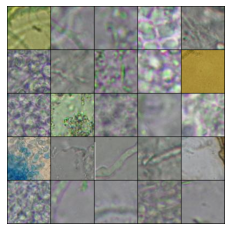

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms, datasets
import os
import matplotlib.pyplot as plt
import numpy as np
batch_size = 128
num_epochs = 20
learning_rate = 0.01
transformations = transforms.Compose([
    transforms.Resize((80, 80)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
train_dataset = datasets.ImageFolder(root='./ProjectDatasetImages/Train', transform=transformations)
test_dataset = datasets.ImageFolder(root='./ProjectDatasetImages/Test', transform=transformations)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
#Plotting 25 images from the 1st batch
dataiter = iter(train_loader)
images, labels = next(dataiter)
plt.imshow(np.transpose(torchvision.utils.make_grid(
    images[:25], normalize=True, padding=1, nrow=5).numpy(), (1, 2, 0)))
plt.axis('off')


Text(0, 0.5, 'Number of training instances')

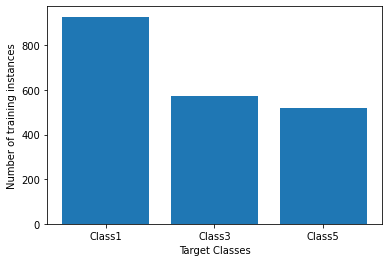

In [2]:
#Iterating over the training dataset and storing the target class for each sample
train_classes = []
for batch_idx, (data, target) in enumerate(train_loader):
    train_classes.extend(target.tolist())

#Calculating the unique classes and the respective counts and plotting them
unique, counts = np.unique(train_classes, return_counts=True)
names = list(train_dataset.class_to_idx.keys())
plt.bar(names, counts)
plt.xlabel("Target Classes")
plt.ylabel("Number of training instances")


In [3]:
import torch.nn as nn


# CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 10 * 10, 512)
        self.fc2 = nn.Linear(512, 5)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(-1, 128 * 10 * 10)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
model = CNN()




In [5]:
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
loss1 = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        loss1.append(loss.item())
#         print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i + 1, len(train_loader), loss.item()))
        if (i + 1) % 10 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i + 1, len(train_loader), loss.item()))


Epoch [1/20], Step [10/16], Loss: 1.1387
Epoch [2/20], Step [10/16], Loss: 0.5113
Epoch [3/20], Step [10/16], Loss: 0.7974
Epoch [4/20], Step [10/16], Loss: 0.7626
Epoch [5/20], Step [10/16], Loss: 0.5242
Epoch [6/20], Step [10/16], Loss: 0.4665
Epoch [7/20], Step [10/16], Loss: 0.4264
Epoch [8/20], Step [10/16], Loss: 0.4904
Epoch [9/20], Step [10/16], Loss: 0.6031
Epoch [10/20], Step [10/16], Loss: 0.3942
Epoch [11/20], Step [10/16], Loss: 0.3284
Epoch [12/20], Step [10/16], Loss: 0.3316
Epoch [13/20], Step [10/16], Loss: 0.2802
Epoch [14/20], Step [10/16], Loss: 0.3454
Epoch [15/20], Step [10/16], Loss: 0.2937
Epoch [16/20], Step [10/16], Loss: 0.2214
Epoch [17/20], Step [10/16], Loss: 0.3242
Epoch [18/20], Step [10/16], Loss: 0.2486
Epoch [19/20], Step [10/16], Loss: 0.1759
Epoch [20/20], Step [10/16], Loss: 0.1765


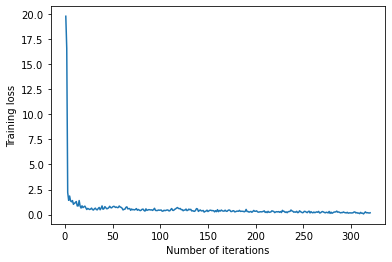

In [7]:
plt.plot(range(1,len(loss1)+1), loss1)
plt.xlabel("Number of iterations")
plt.ylabel("Training loss")
plt.show()

In [8]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Test Accuracy: {:.2f}%'.format(100 * correct / total))

Test Accuracy: 86.57%
